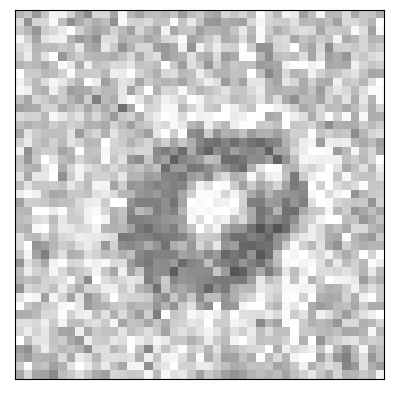

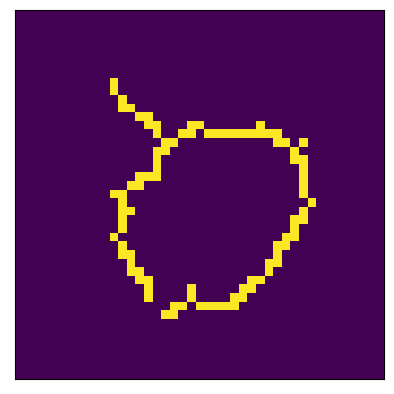

In [4]:
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault)

def canny_edge_detection_agglomerate(img):    
    plt.imshow(img),plt.xticks([]),plt.yticks([])
    plt.show()

    # Convert to graycsale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Blur the image for better edge detection
    img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
    edges = cv2.Canny(image=img_blur, threshold1=140, threshold2=480) # Canny Edge Detection
    plt.xticks([]),plt.yticks([])
    plt.imshow(edges, cmap='viridis')
    cv2.imwrite('..\Figures\Agglomerate\Input_for_polar\Canny_agg_2584.png',edges)
    plt.savefig('..\Figures\Agglomerate\Canny_edge\Canny_agg_2584.png', dpi=600, transparent = True, bbox_inches = 'tight', pad_inches = 0)
    plt.show()
    
# Read the original image
image = cv2.imread(r'..\Figures\Agglomerate\Original_defects\2584.jpg') 
# Display original image
canny_edge_detection_agglomerate(image)


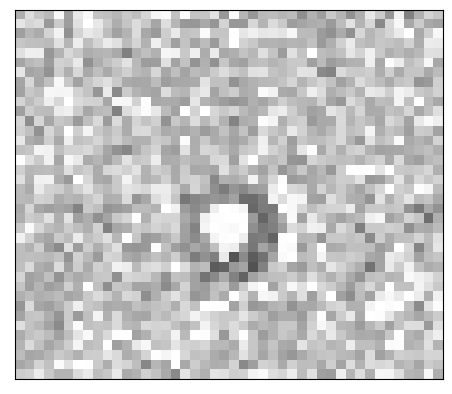

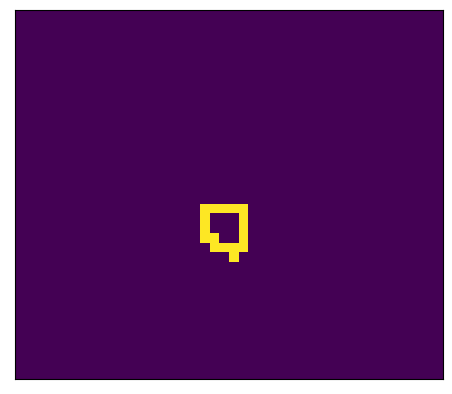

In [5]:
def canny_edge_detection_agglomerate(img):    
    plt.imshow(img),plt.xticks([]),plt.yticks([])
    plt.show()

    # Convert to graycsale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Blur the image for better edge detection
    img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
    edges = cv2.Canny(image=img_blur, threshold1=330, threshold2=550) # Canny Edge Detection
    plt.xticks([]),plt.yticks([])
    plt.imshow(edges, cmap='viridis')
    cv2.imwrite('..\Figures\Agglomerate\Input_for_polar\Canny_agg_2593.png',edges)
    plt.savefig('..\Figures\Agglomerate\Canny_edge\Canny_agg_2593.png', dpi=600, transparent = True, bbox_inches = 'tight', pad_inches = 0)
    plt.show()
    
# Read the original image
image = cv2.imread(r'..\Figures\Agglomerate\Original_defects\2593.jpg') 
# Display original image
canny_edge_detection_agglomerate(image)


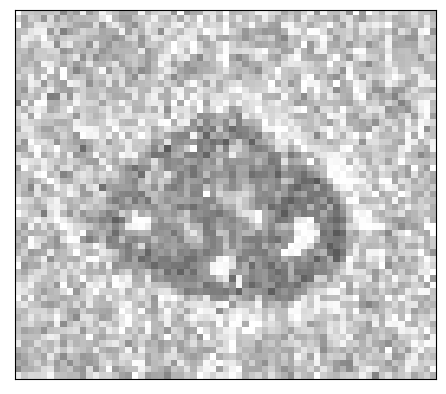

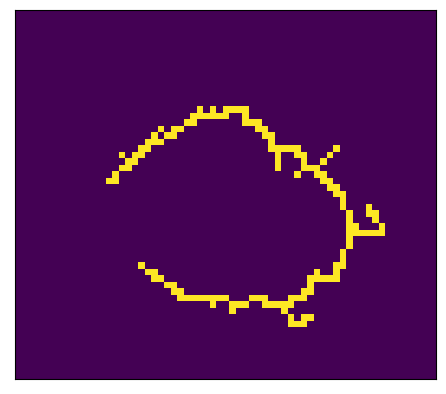

In [6]:
def canny_edge_detection_agglomerate(img):    
    plt.imshow(img),plt.xticks([]),plt.yticks([])
    plt.show()

    # Convert to graycsale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Blur the image for better edge detection
    img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
    edges = cv2.Canny(image=img_blur, threshold1=140, threshold2=500) # Canny Edge Detection
    plt.xticks([]),plt.yticks([])
    plt.imshow(edges, cmap='viridis')
    cv2.imwrite('..\Figures\Agglomerate\Input_for_polar\Canny_agg_26035.png',edges)
    plt.savefig('..\Figures\Agglomerate\Canny_edge\Canny_agg_26035.png', dpi=600, transparent = True, bbox_inches = 'tight', pad_inches = 0)
    plt.show()
    
# Read the original image
image = cv2.imread(r'..\Figures\Agglomerate\Original_defects\26035.jpg') 
# Display original image
canny_edge_detection_agglomerate(image)

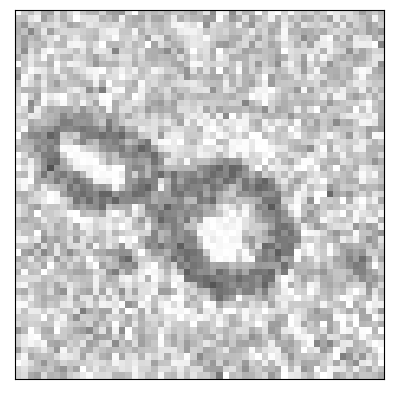

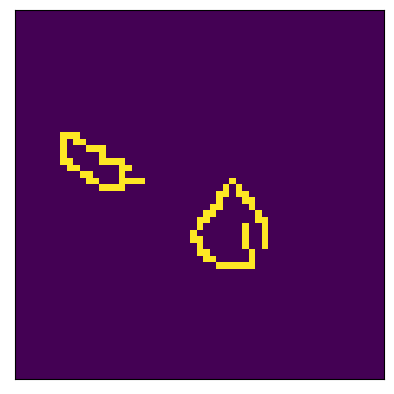

In [7]:
def canny_edge_detection_agglomerate(img):    
    plt.imshow(img),plt.xticks([]),plt.yticks([])
    plt.show()

    # Convert to graycsale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Blur the image for better edge detection
    img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
    edges = cv2.Canny(image=img_blur, threshold1=150, threshold2=500) # Canny Edge Detection
    plt.xticks([]),plt.yticks([])
    plt.imshow(edges, cmap='viridis')
    cv2.imwrite('..\Figures\Agglomerate\Input_for_polar\Canny_agg_26536.png',edges)
    plt.savefig('..\Figures\Agglomerate\Canny_edge\Canny_agg_26536.png', dpi=600, transparent = True, bbox_inches = 'tight', pad_inches = 0)
    plt.show()
    
# Read the original image
image = cv2.imread(r'..\Figures\Agglomerate\Original_defects\26536.jpg') 
# Display original image
canny_edge_detection_agglomerate(image)

# Polar plots

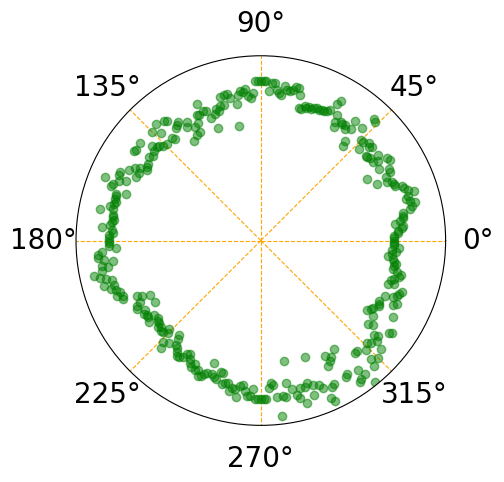

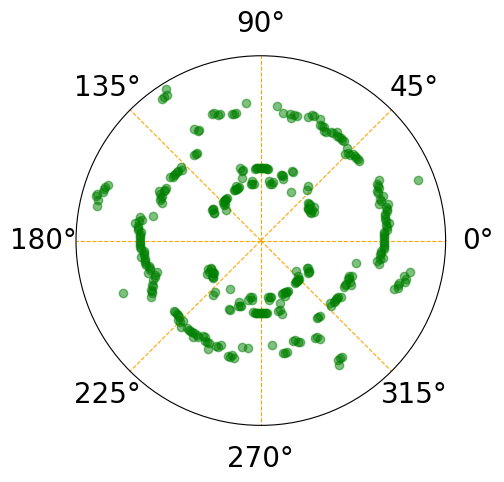

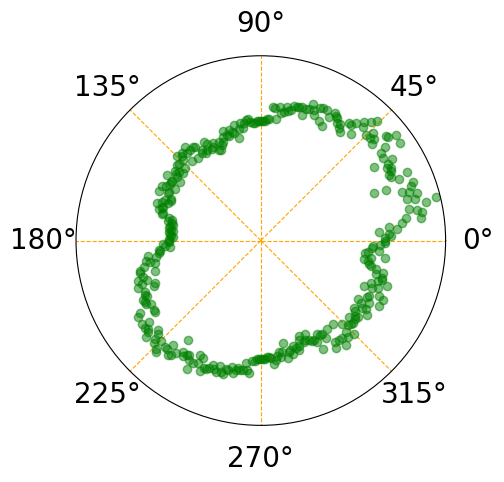

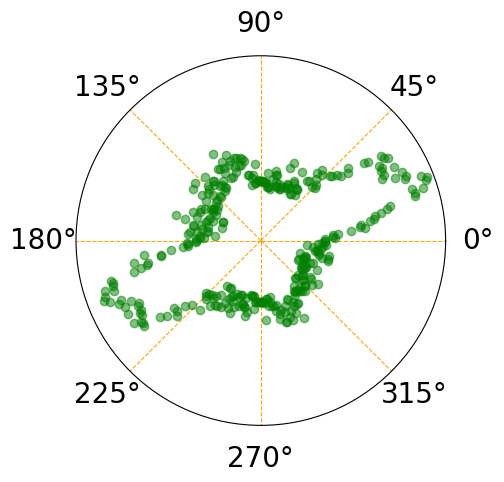

In [9]:
from PIL import Image
import math
import numpy as np
from pathlib import Path
import os

root = Path(r'..\Figures\Agglomerate\Input_for_polar') # directory where original images are stored
assert root.is_dir() # make sure this directory is found
files = sorted(root.glob('*.png'), key=lambda file : file.name) # read files and sort by name so order is consistent

def polar_plot_agglomerate(inpath, outdir):
    image=Image.open(file)

    image_name=(os.path.basename(inpath))  
    plt.rc('xtick', labelsize=20)
    fig = plt.figure(1)
    ax = fig.add_subplot(111, projection='polar')
    
    for k in range(360):
        #convert the image into numpy array
        image_data=image.rotate(k)
        image_data=np.asarray(image_data)

        # Number of rows and columns in the image
        rows=np. size(image_data, 0)
        columns=np. size(image_data, 1)
        RowTotals = np.sum(image_data, axis=1) # Sum down the rows
        nz_row = np.nonzero(RowTotals) # non-zero (non-black) entries

        #Initialize an empty dictionary to store the row and column numbers of non zero entries
        emptyDict = {}

        #Compute the non zero entries (edges) 
        for i in range(np.array(nz_row).size):
            diff_row=[]
            element=(np.array(nz_row))[0][i]
            diff_row.append(element)

            diff_col=[]
            for j in range(columns):
                if (image_data[element][j]).any()!=0:
                    diff_col.append(j)

            emptyDict[tuple(diff_row)] = tuple(diff_col)

        #Compute the distance between the edges
        Distance=[]
        for row in emptyDict.keys():
            if len(emptyDict[row])>1:
                Distance.append(max(emptyDict[row])-min(emptyDict[row]))
            else:
                Distance.append(max(emptyDict[row]))

        theta=math.radians(k)
        rads = math.radians(np.mean(Distance))
        ax.set_yticklabels([])
        ax.yaxis.grid(False)
        ax.tick_params(pad=13)
        ax.xaxis.grid(color='orange', linestyle='--')
        ax.plot(theta, rads, 'go', linewidth=3, alpha=0.5)

    plt.savefig(outdir + image_name + str ('.png'), dpi=600,bbox_inches = 'tight')
    plt.show()
    return

output_root = r'..\Figures\Agglomerate\Polar\\' # place where pre-processed images will be stored
os.makedirs(output_root, exist_ok=True) # create output directory if it does not exist
for file in files:
    polar_plot_agglomerate(file, output_root)